## Problem description
In this challenge, we ask you to build a predictive model that answers the question:
“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
## Data
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc.
One dataset is titled train.csv and the other is titled test.csv.Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly,
will reveal whether they survived or not, also known as the “ground truth”.The test.csv dataset contains similar information
but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.Using the patterns you find in the train.csv data, predict whether the other 
418 passengers on board (found in test.csv) survived.
## Evaluations
the program gets to a accuracy of 95 percent to continue
## Features
* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	`Ticket number`	
* fare	`Passenger fare`	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)


##Model used is 
Since it is a classification problem as we have to predict weather a person has surived or not i.e-`0` or `1`
we will use technique of classification problem

## Import model and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [3]:
titanic_read=pd.read_csv('train.csv')
titanic_read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_read.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_read.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_read.Age.fillna(titanic_read.Age.median(),inplace=True)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\1052692313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_read.Age.fillna(titanic_read.Age.median(),inplace=True)


In [7]:
titanic_read.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [8]:
titanic_read.Age=titanic_read.Age.astype(int)

In [9]:
titanic_read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


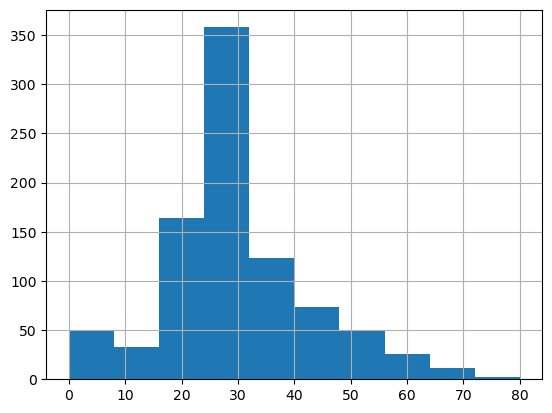

In [10]:
titanic_read.Age.hist();

In [11]:
# Forward fill
titanic_read['Cabin'].fillna(method='ffill', inplace=True)

# Backward fill
titanic_read['Cabin'].fillna(method='bfill', inplace=True)


C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\2230196127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_read['Cabin'].fillna(method='ffill', inplace=True)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\2230196127.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_read['Cabin'].fillna(method='ffill', inplace=True)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\2230196127.py:5: FutureWarning: Series.fillna with '

In [12]:
titanic_read.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [13]:
titanic_read.Embarked.fillna('S',inplace=True)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\1495185558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_read.Embarked.fillna('S',inplace=True)


In [14]:
titanic_read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S


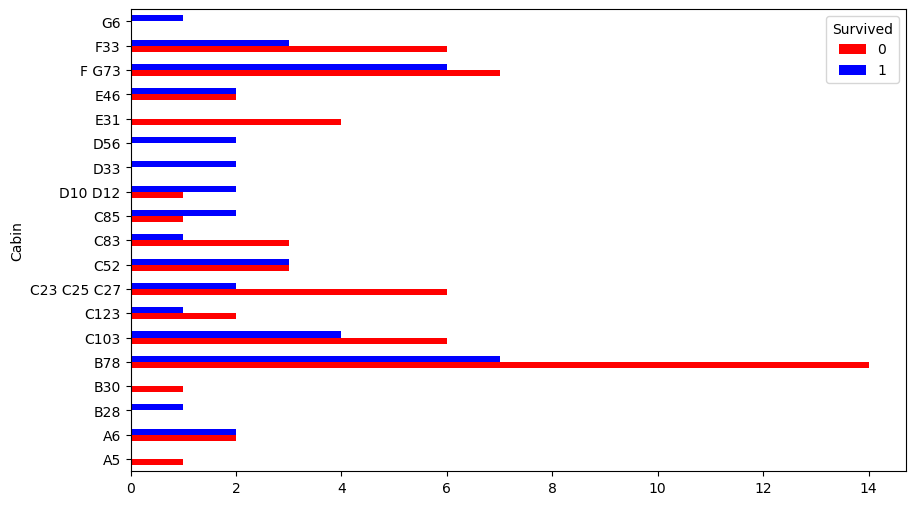

In [15]:
pd.crosstab(titanic_read.Cabin[:100],titanic_read.Survived[:100]).plot(kind='barh',figsize=(10,6),color=['red','blue']);

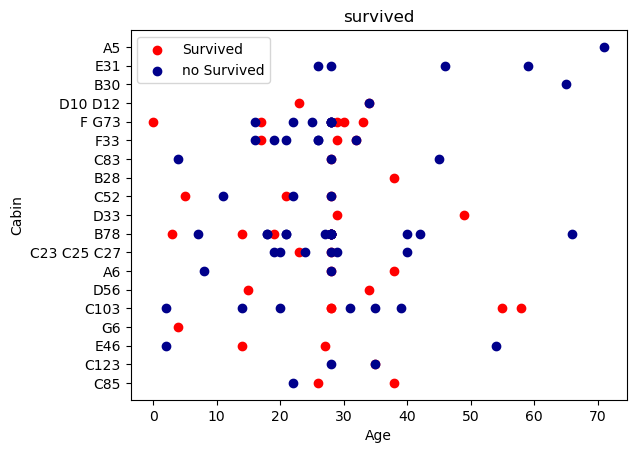

In [16]:
plt.scatter(titanic_read.Age[:100][titanic_read.Survived==1],titanic_read[:100].Cabin[:100][titanic_read.Survived==1],c='red');
plt.scatter(titanic_read.Age[:100][titanic_read.Survived==0],titanic_read[:100].Cabin[:100][titanic_read.Survived==0],c='darkblue');
plt.title('survived')
plt.xlabel('Age')
plt.ylabel('Cabin')
plt.legend(['Survived','no Survived']);

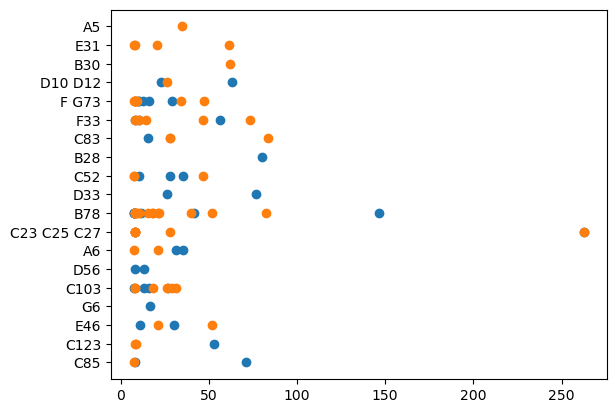

In [17]:
plt.scatter(titanic_read.Fare[:100][titanic_read.Survived==1],titanic_read.Cabin[:100][titanic_read.Survived==1])
plt.scatter(titanic_read.Fare[:100][titanic_read.Survived==0],titanic_read.Cabin[:100][titanic_read.Survived==0]);

In [18]:
models={'Knn':KNeighborsClassifier(),'logistic':LogisticRegression(),'random':RandomForestClassifier()}
def model_scores(model,x_train,x_test,y_train,y_test):
    """
    fits and score given machine learning model within `Model`
    """
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score
    

In [19]:
for label,content in titanic_read.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [20]:
for label,content in titanic_read.items():
    if not pd.api.types.is_numeric_dtype(content):
        titanic_read[label]=pd.Categorical(content).codes+1

In [21]:
np.random.seed(42)
x=titanic_read.drop('Survived',axis=1)
y=titanic_read.Survived
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2))
model_S=model_scores(models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

C:\users\omen\desktop\project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model_S

{'Knn': 0.6759776536312849,
 'logistic': 0.7374301675977654,
 'random': 0.8324022346368715}

In [23]:
model_compare=pd.DataFrame(model_S,index=['accuracy'])

<Axes: >

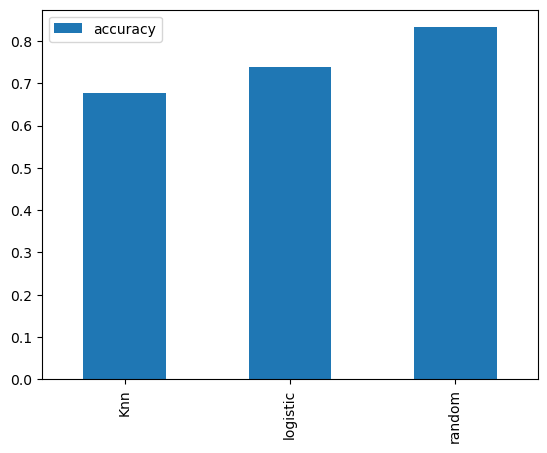

In [24]:
model_compare.T.plot(kind='bar')

In [25]:
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
rf_grid={'n_estimators':np.arange(10,800,50),
         'max_features':['sqrt','log',None],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(2,20,2),
         'max_depth':[None,3,5,10,20,30]}
        

In [27]:
rf_grid_best=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rf_grid_best.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\users\omen\desktop\project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\users\omen\desktop\project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\users\omen\desktop\project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\users\omen\desktop\project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log', None],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760])},
                   verbose=True)

In [28]:
rf_grid_best.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [29]:
rf_grid_best.score(x_test,y_test)

0.8156424581005587

In [30]:
model_S

{'Knn': 0.6759776536312849,
 'logistic': 0.7374301675977654,
 'random': 0.8324022346368715}

In [31]:
y_preds=rf_grid_best.predict(x_test)
y=pd.Series(y_preds)
y.value_counts()

0    114
1     65
Name: count, dtype: int64

In [32]:
y_test.value_counts()

Survived
0    105
1     74
Name: count, dtype: int64

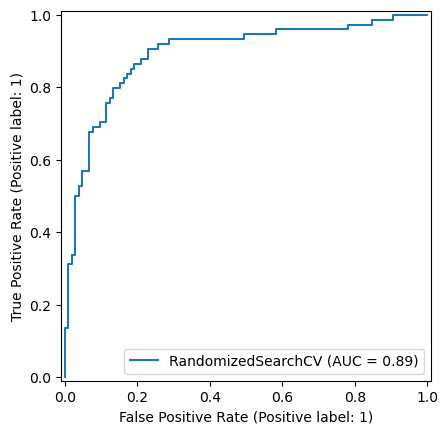

In [33]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf_grid_best,x_test,y_test)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_preds)

array([[93, 12],
       [21, 53]], dtype=int64)

In [35]:
import seaborn as sns
def confuse(y_test,y_preds):
    sns.set(font_scale=1.5)
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('predict_label')
    plt.ylabel('true_label')

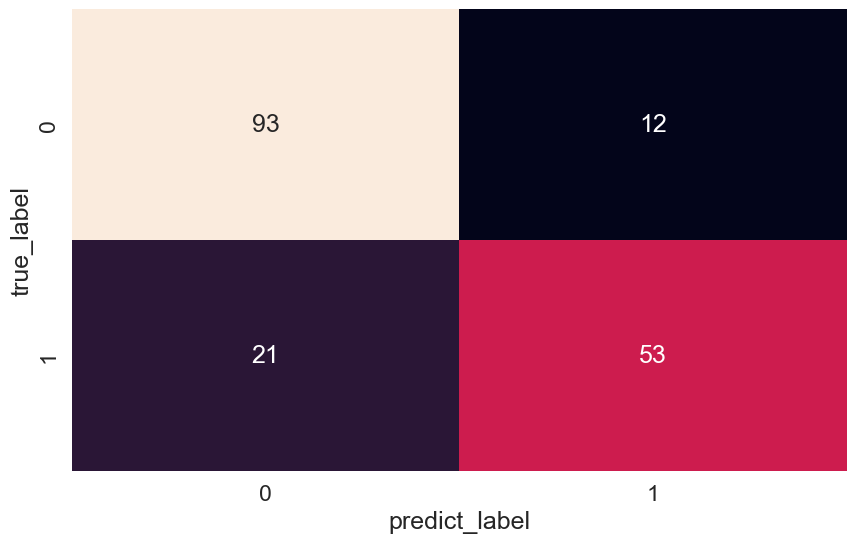

In [36]:
confuse(y_test,y_preds)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [38]:
titanic_read_test=pd.read_csv('test.csv')
titanic_read_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
titanic_read_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
titanic_read_test.Age.fillna(titanic_read_test.Age.median(),inplace=True)
titanic_read_test.Cabin.fillna(method='ffill',inplace=True)
titanic_read_test.Cabin.fillna(method='bfill',inplace=True)
titanic_read_test.Fare.fillna(titanic_read_test.Fare.mean(),inplace=True)
for label,content in titanic_read_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        titanic_read_test[label]=pd.Categorical(content).codes+1

C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\3703107834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_read_test.Age.fillna(titanic_read_test.Age.median(),inplace=True)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\3703107834.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_read_test.Cabin.fillna(method='ffill',inplace=True)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_13388\3703107834.py:3: FutureWarning: Seri

In [42]:
titanic_read_test.Age=titanic_read_test.Age.astype(int)

In [43]:
titanic_read_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,207,2,34,0,0,153,7.8292,13,2
1,893,3,404,1,47,1,0,222,7.0000,13,3
2,894,2,270,2,62,0,0,74,9.6875,13,2
3,895,3,409,2,27,0,0,148,8.6625,13,3
4,896,3,179,1,22,1,1,139,12.2875,13,3


In [44]:
for label,content in titanic_read_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        titanic_read_test[label]=pd.Categorical(content).codes+1

In [ ]:
test_predict=rf_grid_best

In [45]:
test_predict=rf_grid_best.predict(titanic_read_test)
a=pd.Series(test_predict)
a.value_counts()

0    262
1    156
Name: count, dtype: int64

In [46]:
257+161

418

In [47]:
titanic_read_test.PassengerId.value_counts().sum()

418

In [48]:
sub=pd.DataFrame()

In [ ]:
sub['PassengerId']=titanic_read_test.PassengerId
sub['Survived']=test_predict
sub.to_csv('submission.csv')

In [3]:
sub.head()

NameError: name 'sub' is not defined